In [1]:
%load_ext autoreload
%autoreload 2

%reload_ext autoreload

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.4)

import pyspark
from pyspark.sql import SparkSession
import pyspark.sql.functions as F

from src.utils import *
from src.train import train_model
from pyspark.ml.regression import DecisionTreeRegressor, LinearRegression, RandomForestRegressor, GBTRegressor

class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

In [3]:
spark = SparkSession.builder.appName("proj").getOrCreate()

In [4]:
spark

In [5]:
df = spark.read.csv("/dsets/pollution/pollution_2000_2021.csv", header=True, inferSchema=True)

## fix date column

In [6]:
df = df.withColumn("Date", df['Date'].cast("date"))

## clean long city name

In [7]:
df = df.withColumn("City", 
              F.when(F.col("City") == 'Calumet City (PU RR name Calumet Park (sta.))', 
                   'Calumet City').otherwise(F.col("City")))

# train

In [8]:
california_df = df[(df['State'] == 'California')]

In [10]:
models = [LinearRegression, DecisionTreeRegressor, RandomForestRegressor, GBTRegressor]

NO2 AQI
LinearRegression
Root Mean Squared Error (RMSE) on test data = 4.839458009701291

DecisionTreeRegressor
Root Mean Squared Error (RMSE) on test data = 4.150069693609196

RandomForestRegressor
Root Mean Squared Error (RMSE) on test data = 4.5436145931323955

GBTRegressor
Root Mean Squared Error (RMSE) on test data = 3.817344511924237

O3 AQI
LinearRegression
Root Mean Squared Error (RMSE) on test data = 13.754652952886726

DecisionTreeRegressor
Root Mean Squared Error (RMSE) on test data = 8.88838018940362

RandomForestRegressor
Root Mean Squared Error (RMSE) on test data = 9.48455345000048

GBTRegressor
Root Mean Squared Error (RMSE) on test data = 8.968354443579058



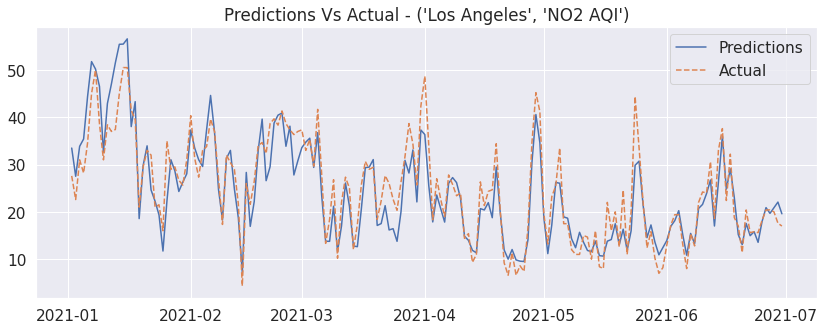

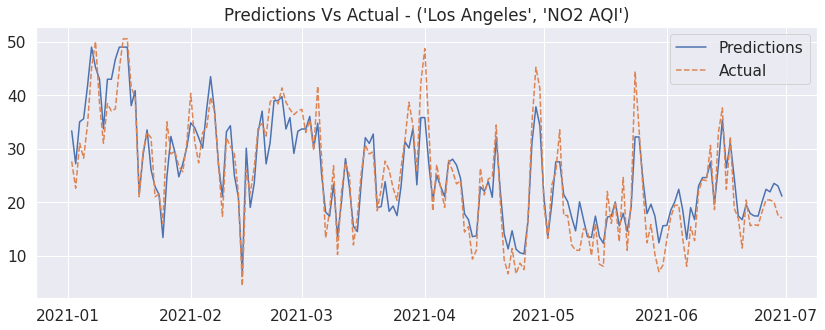

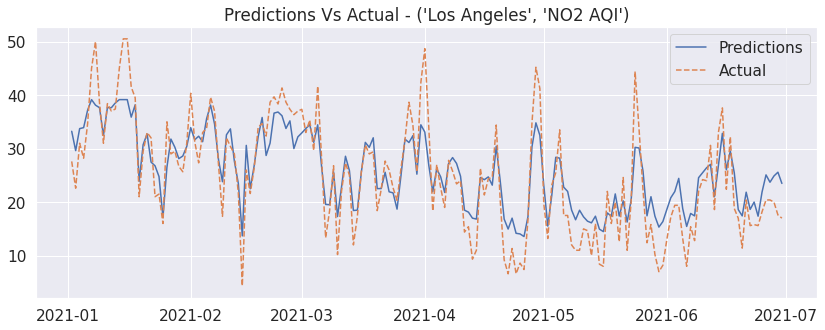

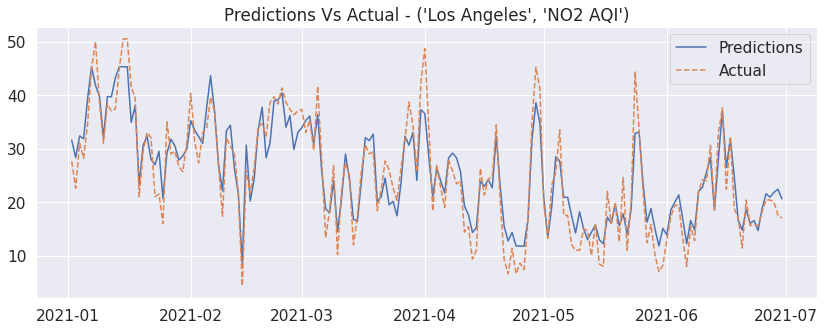

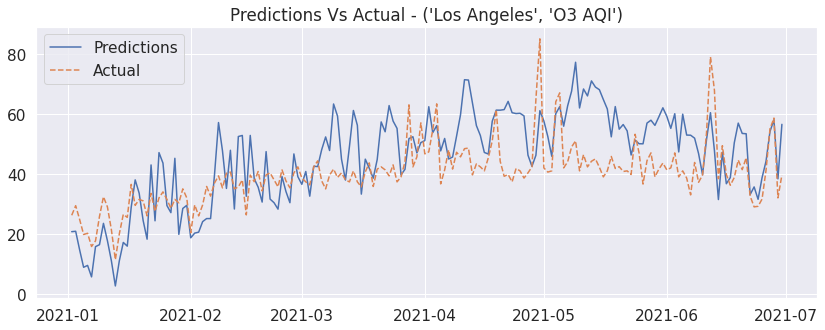

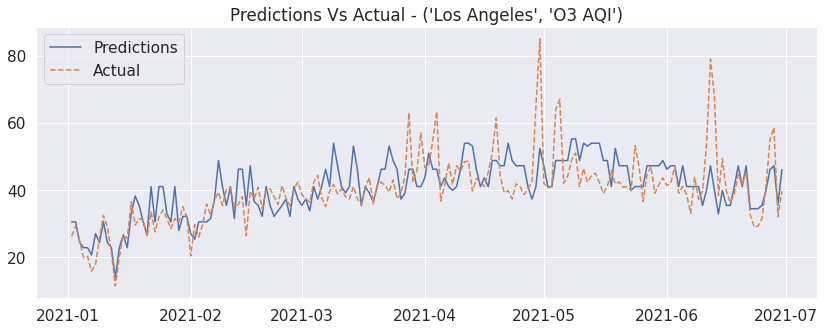

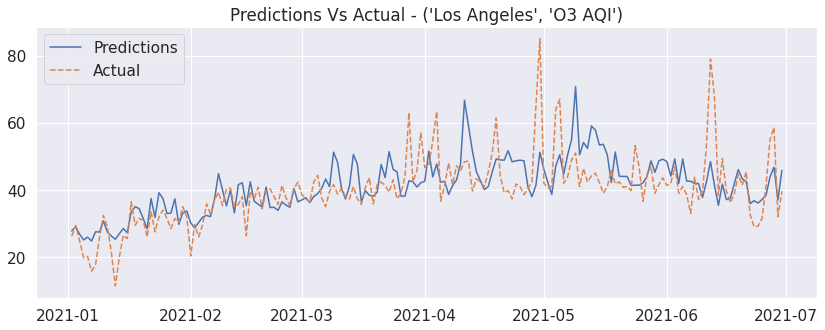

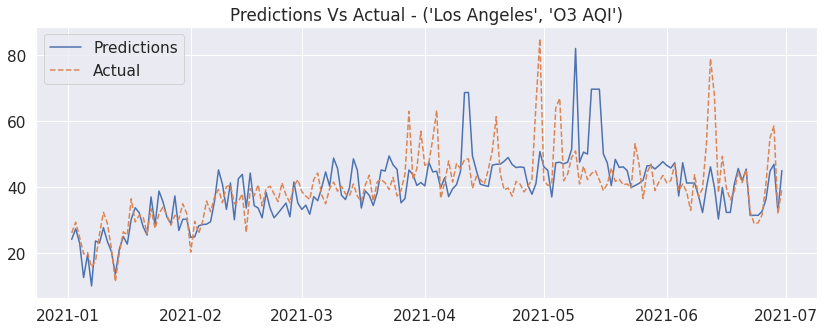

In [11]:
aqi_cols = ['CO AQI', 'NO2 AQI', 'O3 AQI']

for aqi in aqi_cols:
    print(color.BOLD + aqi + color.END)
    for model in models:
        print(color.DARKCYAN + color.UNDERLINE + str(model).split('.')[-1][:-2] + color.END)
        preds = train_model(california_df, model, aqi)
        plot_city_preds(aqi, preds, 'Los Angeles')